# 3.1 Корреляция и простая линейная регрессия (МНК)

В этом уроке мы научимся рассчитывать коэффициенты корреляции и познакомимся с простой линейной регрессией.

Ссылка на скрипт урока:

Корреляция https://stepic.org/media/attachments/lesson/11508/cortest.R

﻿Регрессия ﻿https://stepic.org/media/attachments/lesson/11508/simple_regr.R﻿

In [1]:
df  <- mtcars

In [2]:
cor.test(x = df$mpg, y = df$hp)


	Pearson's product-moment correlation

data:  df$mpg and df$hp
t = -6.7424, df = 30, p-value = 1.788e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.8852686 -0.5860994
sample estimates:
       cor 
-0.7761684 


In [3]:
fit  <- cor.test(x = df$mpg, y = df$hp)

In [4]:
cor.test(~ mpg + hp, df)


	Pearson's product-moment correlation

data:  mpg and hp
t = -6.7424, df = 30, p-value = 1.788e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.8852686 -0.5860994
sample estimates:
       cor 
-0.7761684 


In [5]:
str(fit)


List of 9
 $ statistic  : Named num -6.74
  ..- attr(*, "names")= chr "t"
 $ parameter  : Named int 30
  ..- attr(*, "names")= chr "df"
 $ p.value    : num 1.79e-07
 $ estimate   : Named num -0.776
  ..- attr(*, "names")= chr "cor"
 $ null.value : Named num 0
  ..- attr(*, "names")= chr "correlation"
 $ alternative: chr "two.sided"
 $ method     : chr "Pearson's product-moment correlation"
 $ data.name  : chr "df$mpg and df$hp"
 $ conf.int   : num [1:2] -0.885 -0.586
  ..- attr(*, "conf.level")= num 0.95
 - attr(*, "class")= chr "htest"


In [6]:
fit$p.value


[1] 1.787835e-07

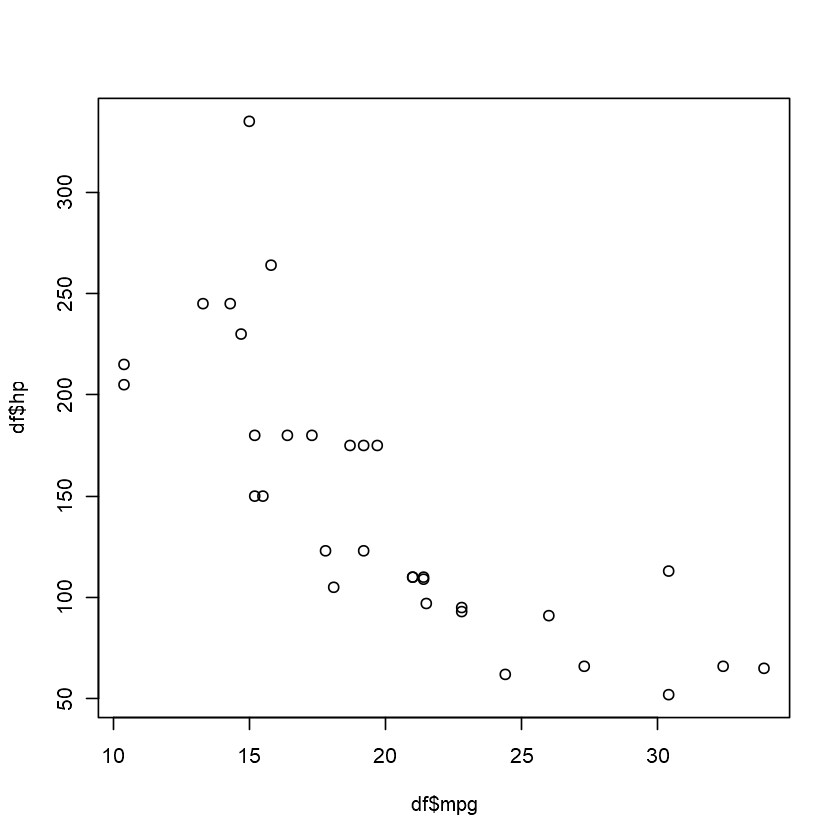

In [7]:
plot(x = df$mpg, y = df$hp)


In [8]:
ggplot(df, aes(x = mpg, y = hp, col = factor(cyl)))+
  geom_point(size = 5)+
  facet_grid(. ~ am)


ERROR: Error in ggplot(df, aes(x = mpg, y = hp, col = factor(cyl))): не могу найти функцию "ggplot"


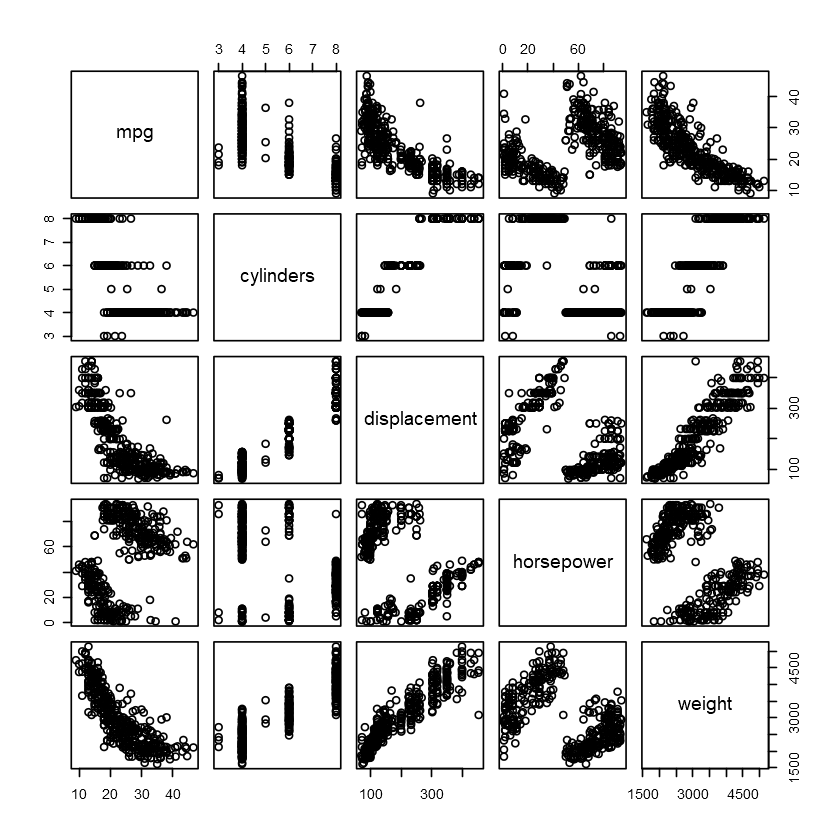

In [13]:
df <- read.csv('auto-mpg.csv')
df_numeric = df[, c(1:5)]
pairs(df_numeric)

In [8]:
cor(df)

ERROR: Error in cor(df): 'x' must be numeric


In [2]:
?mtcars

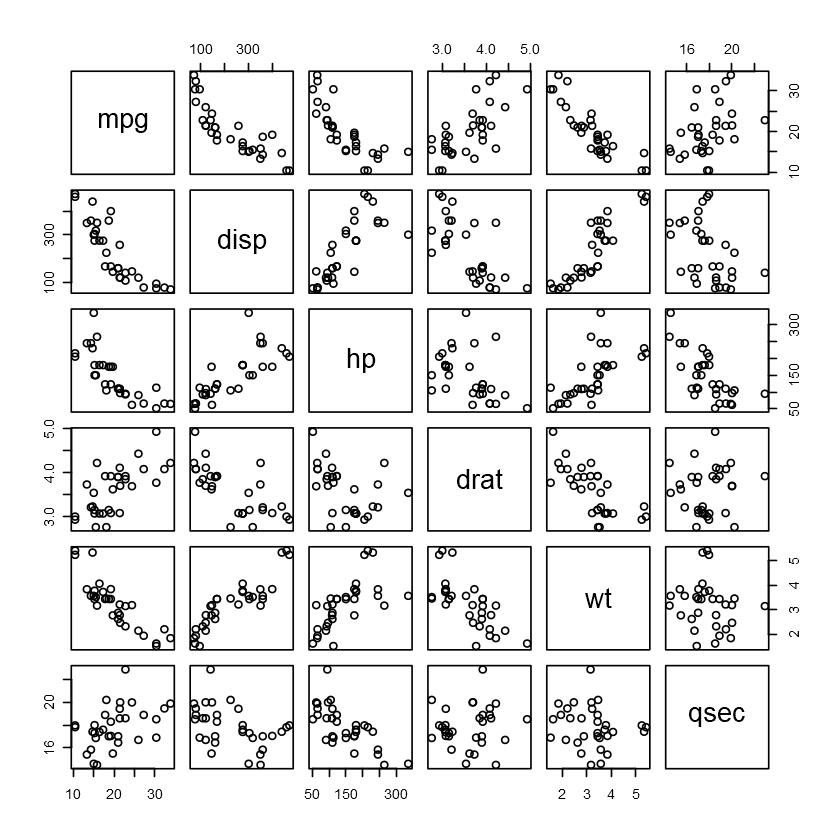

In [9]:
###########################################

df  <- mtcars
df_numeric  <- df[, c(1,3:7)]

pairs(df_numeric)

In [10]:
cor(df_numeric)

,mpg,disp,hp,drat,wt,qsec
mpg,1.0000000,-0.8475514,-0.7761684,0.68117191,-0.8676594,0.41868403
disp,-0.8475514,1.0000000,0.7909486,-0.71021393,0.8879799,-0.43369788
hp,-0.7761684,0.7909486,1.0000000,-0.44875912,0.6587479,-0.70822339
drat,0.6811719,-0.7102139,-0.4487591,1.00000000,-0.7124406,0.09120476
wt,-0.8676594,0.8879799,0.6587479,-0.71244065,1.0000000,-0.17471588
qsec,0.4186840,-0.4336979,-0.7082234,0.09120476,-0.1747159,1.00000000


In [13]:
library(psych)

In [14]:
fit  <- corr.test(df_numeric)
fit$r
fit$p
fit$adjust

,mpg,disp,hp,drat,wt,qsec
mpg,1.0000000,-0.8475514,-0.7761684,0.68117191,-0.8676594,0.41868403
disp,-0.8475514,1.0000000,0.7909486,-0.71021393,0.8879799,-0.43369788
hp,-0.7761684,0.7909486,1.0000000,-0.44875912,0.6587479,-0.70822339
drat,0.6811719,-0.7102139,-0.4487591,1.00000000,-0.7124406,0.09120476
wt,-0.8676594,0.8879799,0.6587479,-0.71244065,1.0000000,-0.17471588
qsec,0.4186840,-0.4336979,-0.7082234,0.09120476,-0.1747159,1.00000000


,mpg,disp,hp,drat,wt,qsec
mpg,0.000000e+00,1.219442e-08,1.966619e-06,1.243368e-04,1.811542e-09,0.0525761455
disp,9.380327e-10,0.000000e+00,8.571214e-07,4.784260e-05,1.833479e-10,0.0525761455
hp,1.787835e-07,7.142679e-08,0.000000e+00,4.994386e-02,2.487496e-04,0.0000478426
drat,1.776240e-05,5.282022e-06,9.988772e-03,0.000000e+00,4.784260e-05,0.6777365683
wt,1.293959e-10,1.222320e-11,4.145827e-05,4.784260e-06,0.000000e+00,0.6777365683
qsec,1.708199e-02,1.314404e-02,5.766253e-06,6.195826e-01,3.388683e-01,0.0000000000


[1] "holm"

In [41]:
df <- mtcars[, c(1,5)]

In [42]:
cor.test(x = df[,1], y = df[,2])[3]

$p.value
[1] 1.77624e-05

In [43]:
cor.test(x = df[,1], y =df[,2])$estimate

cor 
0.6811719

In [46]:
corr.calc <- function(df){
    a <- cor.test(x = df[,1], y =df[,2])
    print(c(as.numeric(a$estimate), as.numeric(a[3])))
}


In [47]:
corr.calc(df)

[1] 0.6811719078 0.0000177624


Напишите функцию filtered.cor которая на вход получает data.frame с  произвольным количеством переменных (как количественными, так и любых других типов), рассчитывает коэффициенты корреляции Пирсона между всеми парами количественных переменных и возвращает наибольшее по модулю значение коэффициента корреляции. (То есть функция может вернуть -0.9, если это наибольшая по модулю  корреляция).

Гарантируется наличие в data.frame хотя бы двух количественных переменных.

Обратите внимание: при проверке вашей функции на вход будут подаваться данные с различными именами колонок. Ваша функция должна корректно работать независимо от имен переменных. Перед тем, как сдавать решение, убедитесь, что ваша функция работает корректно на разных данных, с разными именами колонок. 

Если вы хотите использовать функцию corr.test не забудьте загрузить библиотекy psych.

Данные для тренировки:

https://stepic.org/media/attachments/lesson/11504/step6.csv

```r
step6 <-  read.table("step6.csv",  header=TRUE, sep=',' )

> filtered.cor(step6)

[1] 0.235997


> filtered.cor(my_df) #вымышленные данные, где максимальная по модулю корреляция отрицательна

[1] -0.9


> filtered.cor(iris)


[1] 0.9628654  


> iris$Petal.Length <- -iris$Petal.Length # сделаем отрицательной максимальную по модулю корреляцию
> filtered.cor(iris)

[1] - 0.9628654
```
мы подробнее поговорим о функциях семейства apply в следующем курсе - Advanced R, но вы можете изучить справку о apply и sapply. Для решения данной задачи, эти функции могут пригодиться. 

 + обратите внимание на функцию which.max()
 
+ обратите внимание на конструкцию diag(matrix) <- n﻿
+ если вы получаете ошибку, ﻿'x' must be a numeric vector, ﻿значит в данных остались не только количественные переменные. 

In [162]:
df <- read.csv('https://stepik.org/media/attachments/lesson/11504/step6.csv')
filtered.cor <- function(x){
    out <- c()
    for (i in 1: length(x)){
    if (class(x[,i]) != 'numeric') {
        out <- c(out,i)
        }       
    }
    a<- cor(x[-out])
    diag(a)<- 0
    loc1 <- which(abs(a)==max(abs(a)), arr.ind=TRUE)[1]
    loc2 <- which(abs(a)==max(abs(a)), arr.ind=TRUE)[2]
    return(as.numeric(a[,loc1][loc2]))
}
filtered.cor(df)

[1] 0.235997

Напишите функцию smart_cor, которая получает на вход dataframe с двумя количественными переменными. Проверьте с помощью теста Шапиро-Уилка, что данные в обеих переменных принадлежат нормальному распределению.

Если хотя бы в одном векторе распределение переменной отличается от нормального (p - value меньше 0.05), то функция должна возвращать коэффициент корреляции Спирмена. (Числовой вектор из одного элемента).

Если в обоих векторах распределение переменных от нормального значимо не отличается, то функция должна возвращать коэффициент корреляции Пирсона.
```r
> test_data  <- read.csv("https://stepik.org/media/attachments/course/129/test_data.csv﻿")
> smart_cor(test_data)
[1] -0.1031003
```


In [214]:
test_data  <- read.csv("https://stepik.org/media/attachments/course/129/test_data.csv")

In [218]:
smart_cor <- function(x){
    a <- shapiro.test(x[,1])
    b <- shapiro.test(x[,2])
if (a$p.value < 0.05 | b$p.value < 0.05){
    return (  as.numeric(      cor.test(x[,1], x[,2],method = 'spearman')$estimate)   )
}else{
     return (  as.numeric(     cor.test(x[,1], x[,2])$estimate      )     )
}
}

In [219]:
smart_cor(test_data)

[1] -0.1031003

In [227]:
library(ggplot2)


Attaching package: 'ggplot2'

The following objects are masked from 'package:psych':

    %+%, alpha



In [63]:
df  <- mtcars
df_numeric  <- df[,c(1,3:7)]

fit  <- lm(mpg ~ hp, df)
summary(fit)


Call:
lm(formula = mpg ~ hp, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7121 -2.1122 -0.8854  1.5819  8.2360 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 30.09886    1.63392  18.421  < 2e-16 ***
hp          -0.06823    0.01012  -6.742 1.79e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.863 on 30 degrees of freedom
Multiple R-squared:  0.6024,	Adjusted R-squared:  0.5892 
F-statistic: 45.46 on 1 and 30 DF,  p-value: 1.788e-07


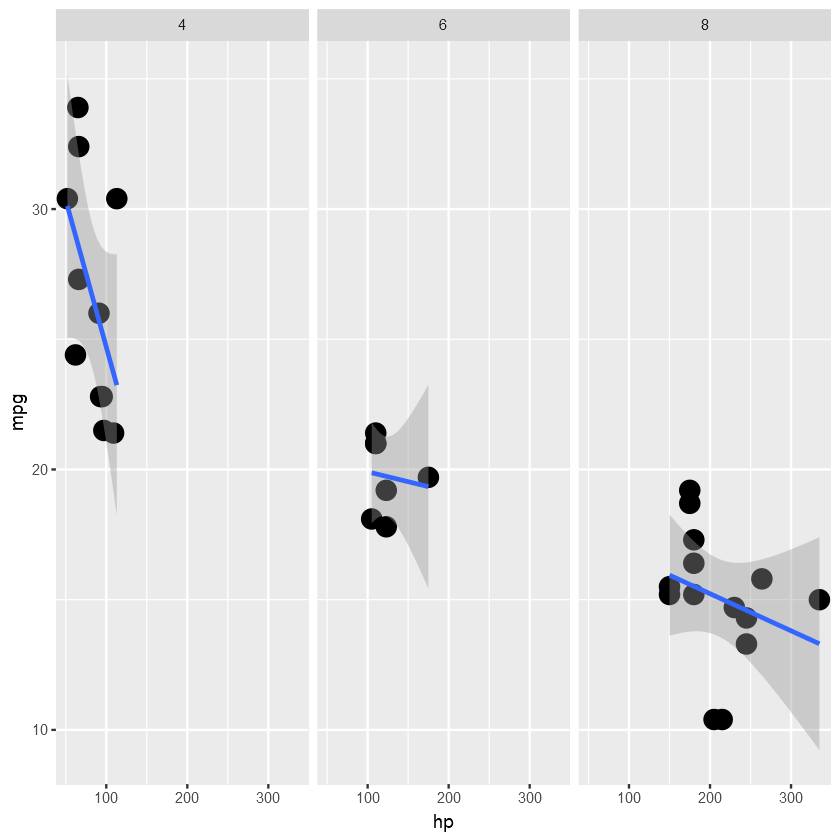

In [64]:
ggplot(df, aes(hp, mpg))+
  geom_point(size = 5)+
  geom_smooth(method = "lm")+
  facet_grid(.~cyl)

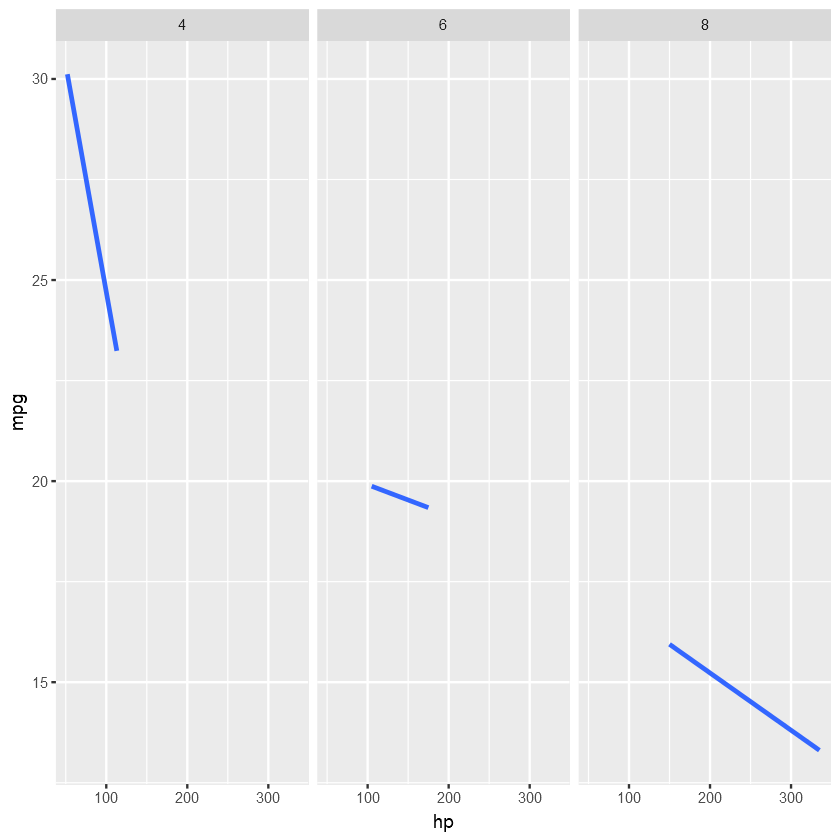

In [65]:
ggplot(df, aes(hp, mpg))+
  geom_smooth(method = "lm", se = F)+
  facet_grid(.~cyl)

In [66]:
fitted_values_mpg  <- data.frame(mpg = df$mpg, fitted = fit$fitted.values )


In [67]:
new_hp <- data.frame(hp = c(100, 150, 129, 300))
new_hp$mpg  <- predict(fit, new_hp)

predict(fit, new_hp)

1         2         3         4 
23.276033 19.864619 21.297413  9.630377

In [68]:
fit


Call:
lm(formula = mpg ~ hp, data = df)

Coefficients:
(Intercept)           hp  
   30.09886     -0.06823  


In [2]:
##################################

my_df  <- mtcars
my_df$cyl  <- factor(my_df$cyl, labels = c("four", "six", "eight"))
fit  <- lm(mpg ~ cyl, my_df)
fit


Call:
lm(formula = mpg ~ cyl, data = my_df)

Coefficients:
(Intercept)       cylsix     cyleight  
     26.664       -6.921      -11.564  


Скачайте набор данных - dataframe с двумя количественными переменными (вспомните при необходимости, как задавать разделитель и другие параметры функции read.table), постройте линейную регрессию, где - первая переменная - зависимая, вторая - независимая. В ответ укажите значения регрессионных коэффициентов сначала intercept затем  slope.

Десятичный разделитель - точка. В поле для ответа введите два числа, не округляйте значения, например;

12.434 6.2557

In [7]:
df <- read.table('data.txt')

In [11]:
fit  <- lm(df$V1 ~df$V2, df)
summary(fit)


Call:
lm(formula = df$V1 ~ df$V2, data = df)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0030391 -0.0011400  0.0003907  0.0012030  0.0028631 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -16.780554   0.003758   -4466   <2e-16 ***
df$V2        -5.518293   0.001250   -4414   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.001659 on 48 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 1.948e+07 on 1 and 48 DF,  p-value: < 2.2e-16


Воспользуемся уже знакомыми данными diamonds из библиотеки ggplot2. Только для бриллиантов класса Ideal (переменная cut) c числом карат равным 0.46 (переменная carat) постройте линейную регрессию, где в качестве зависимой переменной выступает price, в качестве предиктора - переменная  depth. Сохраните коэффициенты регрессии в переменную fit_coef.
Памятка:

```r
> fit <- lm(mpg ~ disp + wt, mtcars)

> fit$coefficients # коэффициенты модели
```
Это задание нужно решить, не используя цикл for().

In [15]:
library(ggplot2)

In [18]:
df <- subset(diamonds, cut == 'Ideal' & carat == 0.46 )
fit  <- lm(df$price ~df$depth, df)
fit_coef <- fit$coefficients

Напишите функцию regr.calc, которая на вход получает dataframe c двумя переменными.

Если две переменные значимо коррелируют (p - уровень значимости для коэффициента корреляции Пирсона меньше 0.05), то функция строит регрессионную модель, где первая переменная - зависимая, вторая - независимая. Затем создает в dataframe новую переменную с назанием fit, где сохраняет предсказанные моделью значения зависимой переменной. В результате функция должна возвращать исходный dataframe с добавленной новой переменной fit.

Если две переменные значимо не коррелируют, то функция возвращает строчку "There is no sense in prediction"

Примеры работы функции:

```r
> my_df = iris[,1:2] # на вход подаем данные iris только с переменными Sepal.Length и Sepal.Width
> regr.calc(iris[,1:2]) # переменные значимо не коррелируют 

[1] "There is no sense in prediction"
```

```r
> my_df = iris[,c(1,4)] # на вход подаем данные iris только с переменными Sepal.Length и Petal.Width
> regr.calc(my_df) # переменные значимо коррелируют 

    Sepal.Length Petal.Width      fit


1            5.1       0.2   4.955345
2            4.9       0.2   4.955345
3            4.7       0.2   4.955345
.            .         .     .
.            .         .     .

```

Обратите внимание, при проверке вашей функции на вход будут подаваться данные с различными именами колонок. Ваша функция должна корректно работать в независимости от имен переменных.

Перед тем как сдавать решение убедитесь, что ваша функция работает корректно на разных данных, с разными именами колонок.

In [95]:
regr.calc <- function(df){
if (  cor.test(x = df[,1], y = df[,2])[3] > 0.05){
   print("There is no sense in prediction")
}else{
    df$fit  <- predict(lm(df[,1] ~ df[,2], df), df[1])
    return(df)
}
}


Постройте scatterplot по данным iris, сохранив его в переменную my_plot : 
Ось X - переменная Sepal.Width
Ось Y -  переменная Petal.Width
Цвет точек - переменная Species
Также добавьте линейное сглаживание для каждой группы наблюдений по переменной Species.

Если Вы все сделали правильно должен получиться следующий график:


Image: https://ucarecdn.com/cbfc7251-e58d-4a28-87ae-2861f7ae0496/


Пожалуйста, сохраняйте график в переменную my_plot.

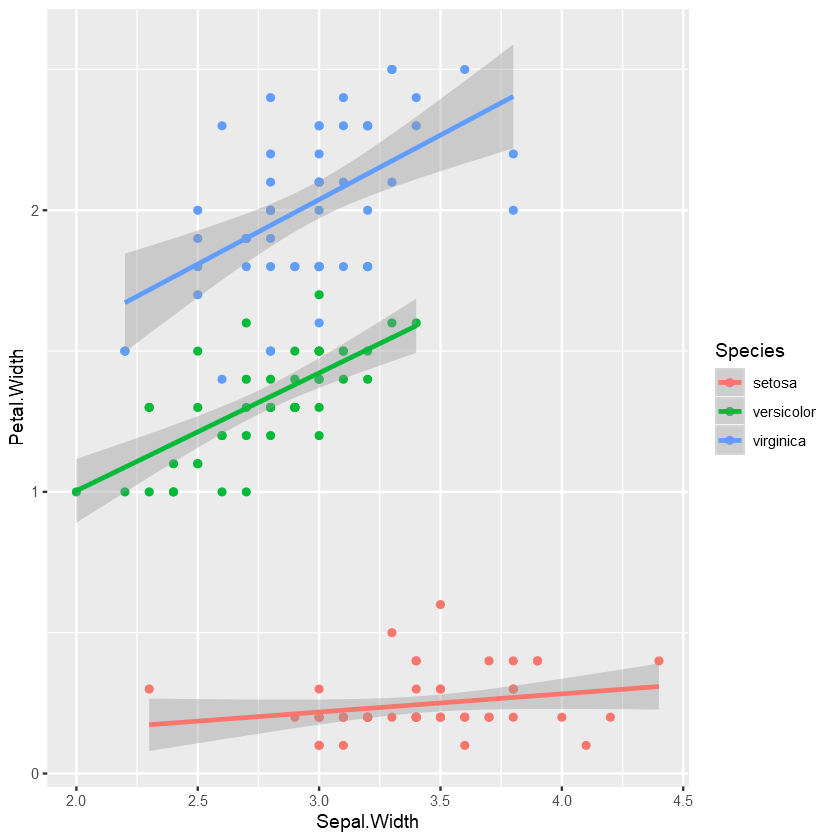

In [16]:
ggplot(iris, aes(Sepal.Width , Petal.Width , col = Species ))+
  geom_point()+
  geom_smooth(method = "lm" )

# Памятка
```r
cor.test(mtcars$mpg, mtcars$disp) # Расчет корреляции Пирсона 



cor.test(~ mpg + disp, mtcars) # запись через формулу




cor.test(mtcars$mpg, mtcars$disp, method = "spearman") # Расчет корреляции Спирмена 

cor.test(mtcars$mpg, mtcars$disp, method = "kendall") # Расчет корреляции Кендала 

cor(iris[, -5]) # построение корреляционной матрицы

fit <- lm(mpg ~ disp, mtcars) # построение линейной регрессии 

fit$coefficients # коэффициенты регрессии 

fit$fitted.values # предсказанные значения зависимой переменной 
 ```
При наличии одинаковых значений в переменных расчет непараметрических корреляций будет сопровождаться предупреждением о невозможности рассчитать точное значение p - value.

Если в ваших данных есть одинаковые наблюдения, но вы хотите рассчитать непараметрическую корреляцию, используйте функцию spearman_test  из пакета coin
```r
library(coin)
spearman_test(~ mpg + disp, mtcars)
```
Обратите внимание на различия в графиках. То что в первом aes() будет распространяться на все слои. А то, что в aes() конкретного geom - только на него.

```r
ggplot(mtcars, aes(mpg, disp, col = factor(am)))+
  geom_point()+
  geom_smooth()



ggplot(mtcars, aes(mpg, disp))+
  geom_point(aes(col = factor(am)))+
  geom_smooth()

ggplot(mtcars, aes(mpg, disp))+
  geom_point()+
  geom_smooth(aes(col = factor(am)))

```

In [19]:
?mtcars